# AMAZON ASSIGNMENT

OBJECTIVE:

*   TO FIND THE OPTIMAL VALUE OF 'K'(No. of nearest neighbours)
*   TO FIND THE ACCURACY SCORE OF OUR PREDICTION ON TEST DATASET.

NOTE:

*   Dataset is preprocessed and time-based splitted(Train , Test , Cross-Validate).
*  SAMPLE_SIZE: 60000 Reviews (40K-TRAIN , 10K-CROSS_VALIDATE , 10K-TEST).








IMPORTING LIBRARIES AND OUR DATASET

In [0]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import sqlite3
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.externals import joblib
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report

IMPORTING THE PREPROCESSED AND TIME_BASED SPLITTED DATASET

In [0]:
Train=joblib.load('TRAIN.joblib')
CrossVal=joblib.load('CROSS_VALIDATE.joblib')
Test=joblib.load('TEST.joblib')

In [0]:
Train_x=Train['Text']
CrossVal_x=CrossVal['Text']
Test_x=Test['Text']
Train_y=Train['Score']
CrossVal_y=CrossVal['Score']
Test_y=Test['Score']

**1. BAG OF WORDS**

In [0]:
count= CountVectorizer(max_features=1000,min_df=50)

In [0]:
count.fit(Train_x)
Train_BOW = count.transform(Train_x)
CrossVal_BOW = count.transform(CrossVal_x)
Test_BOW= count.transform(Test_x) 

In [0]:
Train_BOW_den=Train_BOW.toarray()
CrossVal_BOW_den=CrossVal_BOW.toarray()
Test_BOW_den=Test_BOW.toarray()

In [0]:
Train_BOW_std=StandardScaler().fit_transform(Train_BOW_den)
CrossVal_BOW_std=StandardScaler().fit_transform(CrossVal_BOW_den)
Test_BOW_std=StandardScaler().fit_transform(Test_BOW_den)

FINDING OPTIMAL VALUE OF HYPER PARAMETER(K)

In [0]:
Mylist=list(range(50))
neighbour=list(filter(lambda x: x%2 != 0 , Mylist))
Train_AUC_BOW = []
CrossVal_AUC = []
for i in neighbour:
  neigh = KNeighborsClassifier(n_neighbors=i)
  neigh.fit(Train_BOW_std, Train_y)
  Train_y_pred =  neigh.predict_proba(Train_BOW_std)[:,1]
  Train_AUC_BOW.append(roc_auc_score(Train_y,Train_y_pred))
  CrossVal_y_pred =  neigh.predict_proba(CrossVal_BOW_std)[:,1]
  CrossVal_AUC.append(roc_auc_score(CrossVal_y,CrossVal_y_pred))

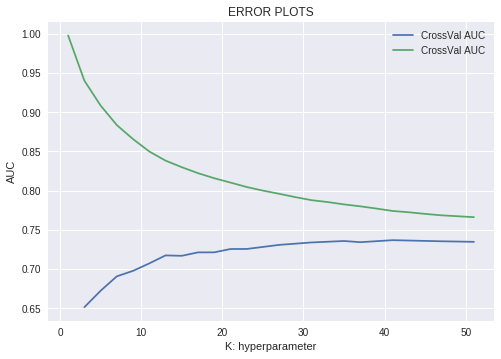

In [0]:
plt.plot(neighbour, CrossVal_AUC, label='CrossVal AUC')
plt.plot(neighbour, Train_AUC_BOW, label='CrossVal AUC')
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.show()

In [0]:
optimal_k=neighbour[CrossVal_AUC.index(max(CrossVal_AUC))]
print(optimal_k)

41


The optimal value of 'K' obtained is 41.



**1.1 BRUTE-FORCE METHOD**

In [0]:
Classifier = KNeighborsClassifier(n_neighbors=41,algorithm='brute')
Classifier.fit(Train_BOW_std, Train_y)
Train_FPR, Train_TPR, Thresholds = roc_curve(Train_y, Classifier.predict_proba(Train_BOW_std)[:,1])
Test_FPR, Test_TPR, Thresholds = roc_curve(Test_y, Classifier.predict_proba(Test_BOW_std)[:,1])

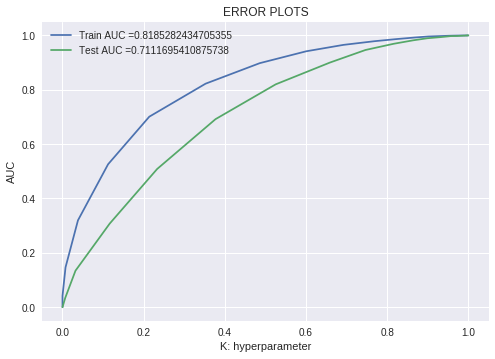

In [11]:
plt.plot(Train_FPR, Train_TPR, label="Train AUC ="+str(auc(Train_FPR, Train_TPR)))
plt.plot(Test_FPR, Test_TPR, label="Test AUC ="+str(auc(Test_FPR, Test_TPR)))
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.show()

In [12]:
A=Classifier.predict(Test_BOW_std)
print('Confusion Matrix of Test Data')
print(confusion_matrix(Test_y,A))
print(classification_report(Test_y,A))

Confusion Matrix of Test Data
[[   8 1334]
 [   3 8655]]
              precision    recall  f1-score   support

           0       0.73      0.01      0.01      1342
           1       0.87      1.00      0.93      8658

   micro avg       0.87      0.87      0.87     10000
   macro avg       0.80      0.50      0.47     10000
weighted avg       0.85      0.87      0.81     10000



**OBSERVATION.**
1. The correct prediction ( TP+TN ) of our model with K=41 on Test Dataset is  8663(86.63%).
2. The Area Under Curve value for Test Dataset is 0.711169541(approx).
3. The brute-force method takes little less time for computation.

**1.2 K-D TREE METHOD**

In [0]:
Classifier = KNeighborsClassifier(n_neighbors=41,algorithm='kd_tree')
Classifier.fit(Train_BOW_std, Train_y)
Train_FPR, Train_TPR, Thresholds = roc_curve(Train_y, Classifier.predict_proba(Train_BOW_std)[:,1])
Test_FPR, Test_TPR, Thresholds = roc_curve(Test_y, Classifier.predict_proba(Test_BOW_std)[:,1])

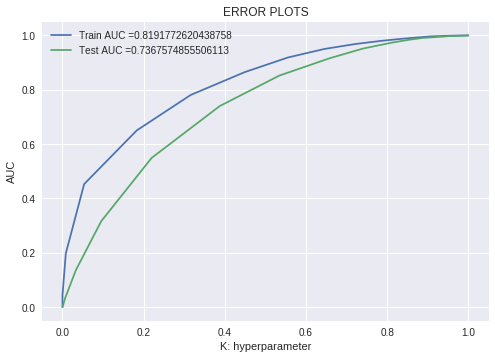

In [0]:
plt.plot(Train_FPR, Train_TPR, label="Train AUC ="+str(auc(Train_FPR, Train_TPR)))
plt.plot(Test_FPR, Test_TPR, label="Test AUC ="+str(auc(Test_FPR, Test_TPR)))
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.show()

In [0]:
A=Classifier.predict(Test_BOW_std)
print('Confusion Matrix of Test Data')
print(confusion_matrix(Test_y,A))
print('\n')
print(classification_report(Test_y,A))

Confusion Matrix of Test Data
[[   4 1421]
 [   1 8574]]


              precision    recall  f1-score   support

           0       0.80      0.00      0.01      1425
           1       0.86      1.00      0.92      8575

   micro avg       0.86      0.86      0.86     10000
   macro avg       0.83      0.50      0.46     10000
weighted avg       0.85      0.86      0.79     10000



**OBSERVATION.**
1. The correct prediction ( TP+TN ) of our model with K=41 on Test Dataset is  8578(85.78%).
2. The Area Under Curve value for Test Dataset is 0.73675748555(approx) a little more than brute-force method case.
3. The kd-tree method takes more time for computation.

**2. BI - GRAM BAG OF WORDS** 

In [0]:
count= CountVectorizer(ngram_range=(1,2),max_features=1000,min_df=50)

In [0]:
count.fit(Train_x)
Train_BOW = count.transform(Train_x)
CrossVal_BOW = count.transform(CrossVal_x)
Test_BOW= count.transform(Test_x) 

In [0]:
Train_BOW_den=Train_BOW.toarray()
CrossVal_BOW_den=CrossVal_BOW.toarray()
Test_BOW_den=Test_BOW.toarray()

In [0]:
Train_BOW_std=StandardScaler().fit_transform(Train_BOW_den)
CrossVal_BOW_std=StandardScaler().fit_transform(CrossVal_BOW_den)
Test_BOW_std=StandardScaler().fit_transform(Test_BOW_den)

FINDING OPTIMAL VALUE OF HYPER PARAMETER(K)

In [0]:
Mylist=list(range(50))
neighbour=list(filter(lambda x: x%2 != 0 , Mylist))
Train_AUC_BOW = []
CrossVal_AUC = []
for i in neighbour:
  neigh = KNeighborsClassifier(n_neighbors=i)
  neigh.fit(Train_BOW_std, Train_y)
  Train_y_pred =  neigh.predict_proba(Train_BOW_std)[:,1]
  Train_AUC_BOW.append(roc_auc_score(Train_y,Train_y_pred))
  CrossVal_y_pred =  neigh.predict_proba(CrossVal_BOW_std)[:,1]
  CrossVal_AUC.append(roc_auc_score(CrossVal_y,CrossVal_y_pred))

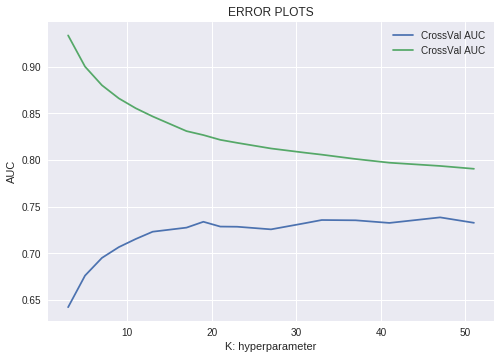

In [0]:
plt.plot(neighbour, CrossVal_AUC, label='CrossVal AUC')
plt.plot(neighbour, Train_AUC_BOW, label='CrossVal AUC')
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.show()

In [0]:
optimal_k=neighbour[CrossVal_AUC.index(max(CrossVal_AUC))]
print(optimal_k)

47


The optimal value of 'K' obtained is 47.

**2.1 BRUTE-FORCE METHOD**

In [0]:
Classifier = KNeighborsClassifier(n_neighbors=47,algorithm='brute')
Classifier.fit(Train_BOW_std, Train_y)
Train_FPR, Train_TPR, Thresholds = roc_curve(Train_y, Classifier.predict_proba(Train_BOW_std)[:,1])
Test_FPR, Test_TPR, Thresholds = roc_curve(Test_y, Classifier.predict_proba(Test_BOW_std)[:,1])

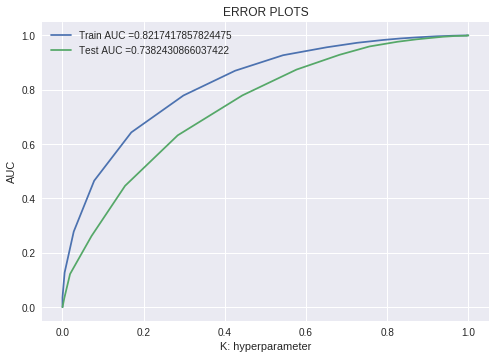

In [18]:
plt.plot(Train_FPR, Train_TPR, label="Train AUC ="+str(auc(Train_FPR, Train_TPR)))
plt.plot(Test_FPR, Test_TPR, label="Test AUC ="+str(auc(Test_FPR, Test_TPR)))
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.show()

In [19]:
A=Classifier.predict(Test_BOW_std)
print('Confusion Matrix of Test Data')
print(confusion_matrix(Test_y,A))
print('\n')
print(classification_report(Test_y,A))

Confusion Matrix of Test Data
[[   6 1336]
 [   3 8655]]


              precision    recall  f1-score   support

           0       0.67      0.00      0.01      1342
           1       0.87      1.00      0.93      8658

   micro avg       0.87      0.87      0.87     10000
   macro avg       0.77      0.50      0.47     10000
weighted avg       0.84      0.87      0.80     10000



**OBSERVATION.**
1. The correct prediction ( TP+TN ) of our model with K=47 on Test Dataset is  8661(86.61%).
2. The Area Under Curve value for Test Dataset is 0.738243(approx).
3. The brute-force method takes little less time for computation.

**2.2 K-D TREE METHOD**

In [0]:
Classifier = KNeighborsClassifier(n_neighbors=optimal_k,algorithm='kd_tree')
Classifier.fit(Train_BOW_std, Train_y)
Train_FPR, Train_TPR, Thresholds = roc_curve(Train_y, Classifier.predict_proba(Train_BOW_std)[:,1])
Test_FPR, Test_TPR, Thresholds = roc_curve(Test_y, Classifier.predict_proba(Test_BOW_std)[:,1])

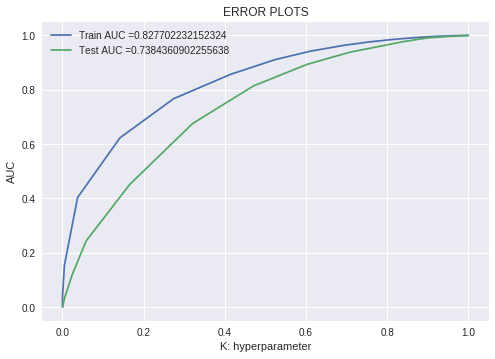

In [0]:
plt.plot(Train_FPR, Train_TPR, label="Train AUC ="+str(auc(Train_FPR, Train_TPR)))
plt.plot(Test_FPR, Test_TPR, label="Test AUC ="+str(auc(Test_FPR, Test_TPR)))
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.show()

In [0]:
A=Classifier.predict(Test_BOW_std)
print('Confusion Matrix of Test Data')
print(confusion_matrix(Test_y,A))
print('\n')
print(classification_report(Test_y,A))

Confusion Matrix of Test Data
[[   4 1421]
 [   1 8574]]


              precision    recall  f1-score   support

           0       0.80      0.00      0.01      1425
           1       0.86      1.00      0.92      8575

   micro avg       0.86      0.86      0.86     10000
   macro avg       0.83      0.50      0.46     10000
weighted avg       0.85      0.86      0.79     10000



**OBSERVATION.**
1. The correct prediction ( TP+TN ) of our model with K=47 on Test Dataset is  8578(85.78%).
2. The Area Under Curve value for Test Dataset is 0.73843609(approx) a little more than brute-force method case.
3. The kd-tree method takes more time for computation.

**3. TF-IDF**

In [0]:
tf_idf=TfidfVectorizer(ngram_range=(1,2),max_features=1000,min_df=50)

In [0]:
tf_idf.fit(Train_x)
Train_TFIDF = tf_idf.transform(Train_x)
CrossVal_TFIDF = tf_idf.transform(CrossVal_x)
Test_TFIDF= tf_idf.transform(Test_x) 

In [0]:
Train_TFIDF_den=Train_TFIDF.toarray()
CrossVal_TFIDF_den=CrossVal_TFIDF.toarray()
Test_TFIDF_den=Test_TFIDF.toarray()

In [0]:
Train_TFIDF_std=StandardScaler().fit_transform(Train_TFIDF_den)
CrossVal_TFIDF_std=StandardScaler().fit_transform(CrossVal_TFIDF_den)
Test_TFIDF_std=StandardScaler().fit_transform(Test_TFIDF_den)

FINDING OPTIMAL VALUE OF HYPER PARAMETER(K)

In [0]:
Mylist=list(range(50))
neighbour=list(filter(lambda x: x%2 != 0 , Mylist))
Train_AUC_TFIDF = []
CrossVal_AUC_TFIDF = []
for i in neighbour:
  neigh = KNeighborsClassifier(n_neighbors=i)
  neigh.fit(Train_TFIDF_std, Train_y)
  Train_y_pred =  neigh.predict_proba(Train_TFIDF_std)[:,1]
  Train_AUC_TFIDF.append(roc_auc_score(Train_y,Train_y_pred))
  CrossVal_y_pred =  neigh.predict_proba(CrossVal_TFIDF_std)[:,1]
  CrossVal_AUC_TFIDF.append(roc_auc_score(CrossVal_y,CrossVal_y_pred))

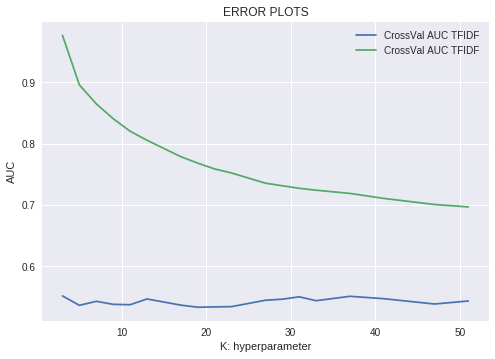

In [0]:
plt.plot(neighbour, CrossVal_AUC_TFIDF, label='CrossVal AUC TFIDF')
plt.plot(neighbour, Train_AUC_TFIDF, label='Train AUC TFIDF')
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.show()

In [0]:
optimal_k=neighbour[CrossVal_AUC_TFIDF.index(max(CrossVal_AUC_TFIDF))]
print(optimal_k)

3


The optimal value of 'K' obtained is 3.

**3.1 BRUTE-FORCE METHOD**

In [0]:
Classifier = KNeighborsClassifier(n_neighbors=3,algorithm='brute')
Classifier.fit(Train_TFIDF_std, Train_y)
Train_FPR, Train_TPR, Thresholds = roc_curve(Train_y, Classifier.predict_proba(Train_TFIDF_std)[:,1])
Test_FPR, Test_TPR, Thresholds = roc_curve(Test_y, Classifier.predict_proba(Test_TFIDF_std)[:,1])

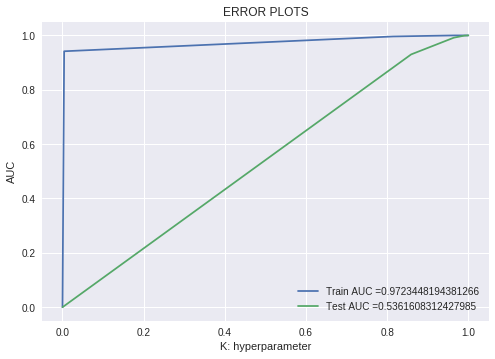

In [0]:
plt.plot(Train_FPR, Train_TPR, label="Train AUC ="+str(auc(Train_FPR, Train_TPR)))
plt.plot(Test_FPR, Test_TPR, label="Test AUC ="+str(auc(Test_FPR, Test_TPR)))
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.show()

In [0]:
A=Classifier.predict(Test_TFIDF_std)
print('Confusion Matrix of Test Data')
print(confusion_matrix(Test_y,A))
print('\n')
print(classification_report(Test_y,A))

Confusion Matrix of Test Data
[[  48 1294]
 [  73 8585]]


              precision    recall  f1-score   support

           0       0.40      0.04      0.07      1342
           1       0.87      0.99      0.93      8658

   micro avg       0.86      0.86      0.86     10000
   macro avg       0.63      0.51      0.50     10000
weighted avg       0.81      0.86      0.81     10000



**OBSERVATION.**
1. The correct prediction ( TP+TN ) of our model with K=3 on Test Dataset is  8633(86.33%).
2. The Area Under Curve value for Test Dataset is 0.536160831(approx).
3. The brute-force method takes little less time for computation.
4. The Area Under Curve value is low with respect to other methods.

**3.2 K-D TREE METHOD**

In [0]:
Classifier = KNeighborsClassifier(n_neighbors=3,algorithm='kd_tree')
Classifier.fit(Train_TFIDF_std, Train_y)
Train_FPR, Train_TPR, Thresholds = roc_curve(Train_y, Classifier.predict_proba(Train_TFIDF_std)[:,1])
Test_FPR, Test_TPR, Thresholds = roc_curve(Test_y, Classifier.predict_proba(Test_TFIDF_std)[:,1])

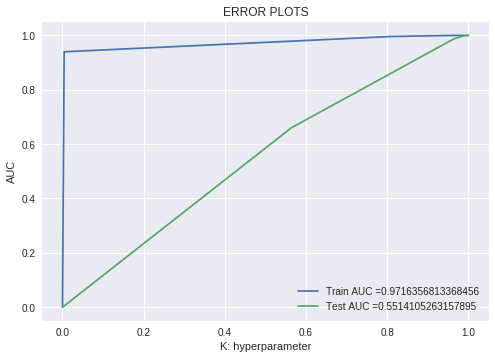

In [0]:
plt.plot(Train_FPR, Train_TPR, label="Train AUC ="+str(auc(Train_FPR, Train_TPR)))
plt.plot(Test_FPR, Test_TPR, label="Test AUC ="+str(auc(Test_FPR, Test_TPR)))
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.show()

In [0]:
A=Classifier.predict(Test_TFIDF_std)
print('Confusion Matrix of Test Data')
print(confusion_matrix(Test_y,A))
print('\n')
print(classification_report(Test_y,A))

Confusion Matrix of Test Data
[[  49 1376]
 [ 101 8474]]


              precision    recall  f1-score   support

           0       0.33      0.03      0.06      1425
           1       0.86      0.99      0.92      8575

   micro avg       0.85      0.85      0.85     10000
   macro avg       0.59      0.51      0.49     10000
weighted avg       0.78      0.85      0.80     10000



**OBSERVATION.**
1. The correct prediction ( TP+TN ) of our model with K=3 on Test Dataset is  8523(85.23%) slightly less than brute-force method.
2. The Area Under Curve value for Test Dataset is 0.55141052(approx) a little more than brute-force method case.
3. The kd-tree method takes more time for computation.
4. The Area Under Curve value is low with respect to other methods.

**4. AVERAGE WORD TO VECTOR.**

**NOTE:**
Imported file already contains the calculated value of avg-w2vec of our dataset.

In [0]:
AVG_W2VEC=joblib.load('AVG_W2VEC.joblib')

In [0]:
Train_AVG_W2VEC=AVG_W2VEC
CrossVal_AVG_W2VEC=AVG_W2VEC
Test_AVG_W2VEC=AVG_W2VEC

FINDING OPTIMAL VALUE OF HYPER PARAMETER(K)

In [0]:
Mylist=list(range(50))
neighbour=list(filter(lambda x: x%2 != 0 , Mylist))
Train_AUC_W2VEC = []
CrossVal_AUC_W2VEC = []
for i in neighbour:
  neigh = KNeighborsClassifier(n_neighbors=i)
  neigh.fit(Train_AVG_W2VEC, Train_y)
  Train_y_pred =  neigh.predict_proba(Train_AVG_W2VEC)[:,1]
  Train_AUC_W2VEC.append(roc_auc_score(Train_y,Train_y_pred))
  CrossVal_y_pred =  neigh.predict_proba(CrossVal_AVG_W2VEC)[:,1]
  CrossVal_AUC_W2VEC.append(roc_auc_score(CrossVal_y,CrossVal_y_pred))

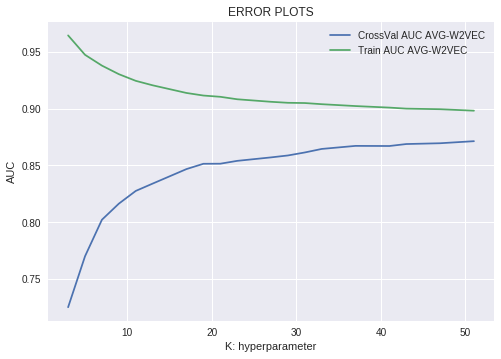

In [0]:
plt.plot(neighbour, CrossVal_AUC_W2VEC, label='CrossVal AUC AVG-W2VEC')
plt.plot(neighbour, Train_AUC_W2VEC, label='Train AUC AVG-W2VEC')
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.show()

In [0]:
optimal_k=neighbour[CrossVal_AUC_W2VEC.index(max(CrossVal_AUC_W2VEC))]
print(optimal_k)

51


The optimal value of 'K' obtained is 51.

**4.1 BRUTE-FORCE METHOD**

In [0]:
Classifier = KNeighborsClassifier(n_neighbors=optimal_k,algorithm='brute')
Classifier.fit(Train_AVG_W2VEC, Train_y)
Train_FPR, Train_TPR, Thresholds = roc_curve(Train_y, Classifier.predict_proba(Train_AVG_W2VEC)[:,1])
Test_FPR, Test_TPR, Thresholds = roc_curve(Test_y, Classifier.predict_proba(Test_AVG_W2VEC)[:,1])

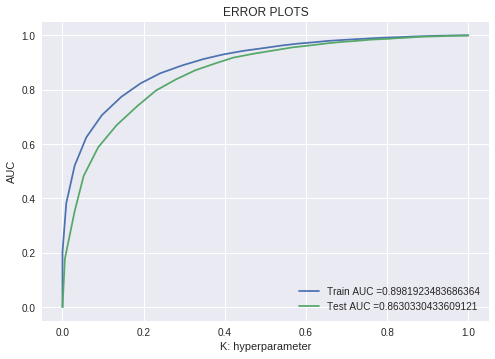

In [0]:
plt.plot(Train_FPR, Train_TPR, label="Train AUC ="+str(auc(Train_FPR, Train_TPR)))
plt.plot(Test_FPR, Test_TPR, label="Test AUC ="+str(auc(Test_FPR, Test_TPR)))
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.show()

In [0]:
A=Classifier.predict(Test_AVG_W2VEC)
print('Confusion Matrix of Test Data')
print(confusion_matrix(Test_y,A))
print('\n')
print(classification_report(Test_y,A))

Confusion Matrix of Test Data
[[ 153 1189]
 [  42 8616]]


              precision    recall  f1-score   support

           0       0.78      0.11      0.20      1342
           1       0.88      1.00      0.93      8658

   micro avg       0.88      0.88      0.88     10000
   macro avg       0.83      0.55      0.57     10000
weighted avg       0.87      0.88      0.83     10000



**OBSERVATION.**
1. The correct prediction ( TP+TN ) of our model with K=51 on Test Dataset is  8769(87.69%).
2. The Area Under Curve value for Test Dataset is 0.86303304(approx) .
3. The brute-force method takes little less time for computation.
4. The Area Under Curve value is very high with respect to other methods.

**4.2 K-D TREE METHOD**

In [0]:
Classifier = KNeighborsClassifier(n_neighbors=optimal_k,algorithm='kd_tree')
Classifier.fit(Train_AVG_W2VEC, Train_y)
Train_FPR, Train_TPR, Thresholds = roc_curve(Train_y, Classifier.predict_proba(Train_AVG_W2VEC)[:,1])
Test_FPR, Test_TPR, Thresholds = roc_curve(Test_y, Classifier.predict_proba(Test_AVG_W2VEC)[:,1])

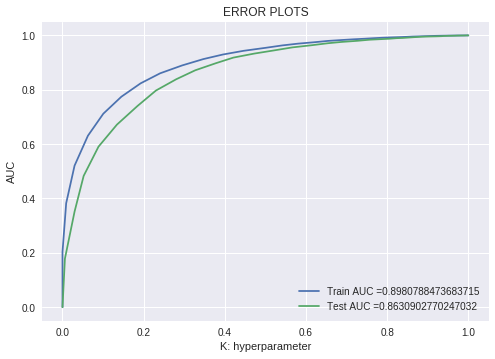

In [0]:
plt.plot(Train_FPR, Train_TPR, label="Train AUC ="+str(auc(Train_FPR, Train_TPR)))
plt.plot(Test_FPR, Test_TPR, label="Test AUC ="+str(auc(Test_FPR, Test_TPR)))
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.show()

In [0]:
A=Classifier.predict(Test_AVG_W2VEC)
print('Confusion Matrix of Test Data')
print(confusion_matrix(Test_y,A))
print('\n')
print(classification_report(Test_y,A))

Confusion Matrix of Test Data
[[ 153 1189]
 [  42 8616]]


              precision    recall  f1-score   support

           0       0.78      0.11      0.20      1342
           1       0.88      1.00      0.93      8658

   micro avg       0.88      0.88      0.88     10000
   macro avg       0.83      0.55      0.57     10000
weighted avg       0.87      0.88      0.83     10000



**OBSERVATION.**
1. The correct prediction ( TP+TN ) of our model with K=51 on Test Dataset is  8769(87.69%) .
2. The Area Under Curve value for Test Dataset is 0.863090(approx) .
3. The kd-tree method takes more time for computation.
4. The Area Under Curve value is high with respect to other methods.

**5. TFIDF AVERAGE W2VEC.**

**NOTE:**
Imported file already contains the calculated value of tfidf avg-w2vec of our dataset.

In [0]:
AVG_TFIDF=joblib.load('AVG_TFIDF.joblib')

In [0]:
Train_AVG_TFIDF=AVG_TFIDF
CrossVal_AVG_TFIDF=AVG_TFIDF
Test_AVG_TFIDF=AVG_TFIDF

FINDING OPTIMAL VALUE OF HYPER PARAMETER(K)

In [0]:
Mylist=list(range(50))
neighbour=list(filter(lambda x: x%2 != 0 , Mylist))
Train_AUC_TFIDF = []
CrossVal_AUC_TFIDF = []
for i in neighbour:
  neigh = KNeighborsClassifier(n_neighbors=i)
  neigh.fit(Train_AVG_TFIDF, Train_y)
  Train_y_pred =  neigh.predict_proba(Train_AVG_TFIDF)[:,1]
  Train_AUC_TFIDF.append(roc_auc_score(Train_y,Train_y_pred))
  CrossVal_y_pred =  neigh.predict_proba(CrossVal_AVG_TFIDF)[:,1]
  CrossVal_AUC_TFIDF.append(roc_auc_score(CrossVal_y,CrossVal_y_pred))

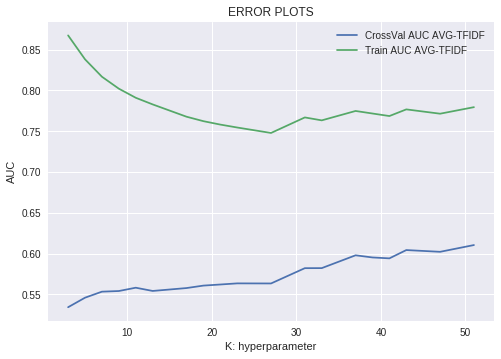

In [8]:
plt.plot(neighbour, CrossVal_AUC_TFIDF, label='CrossVal AUC AVG-TFIDF')
plt.plot(neighbour, Train_AUC_TFIDF, label='Train AUC AVG-TFIDF')
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.show()

In [9]:
optimal_k=neighbour[CrossVal_AUC_TFIDF.index(max(CrossVal_AUC_TFIDF))]
print(optimal_k)

51


The optimal value of 'K' obtained is 51.

**5.1 BRUTE-FORCE METHOD**

In [0]:
Classifier = KNeighborsClassifier(n_neighbors=optimal_k,algorithm='brute')
Classifier.fit(Train_AVG_TFIDF, Train_y)
Train_FPR, Train_TPR, Thresholds = roc_curve(Train_y, Classifier.predict_proba(Train_AVG_TFIDF)[:,1])
Test_FPR, Test_TPR, Thresholds = roc_curve(Test_y, Classifier.predict_proba(Test_AVG_TFIDF)[:,1])

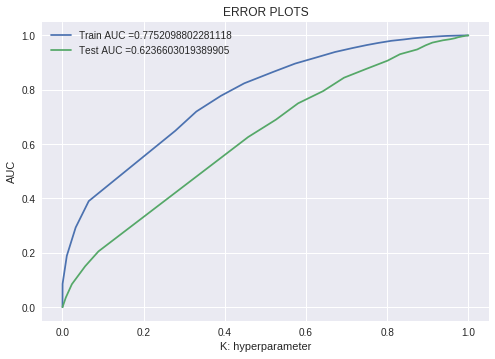

In [11]:
plt.plot(Train_FPR, Train_TPR, label="Train AUC ="+str(auc(Train_FPR, Train_TPR)))
plt.plot(Test_FPR, Test_TPR, label="Test AUC ="+str(auc(Test_FPR, Test_TPR)))
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.show()

In [13]:
A=Classifier.predict(Test_AVG_TFIDF)
print('Confusion Matrix of Test Data')
print(confusion_matrix(Test_y,A))
print('\n')
print(classification_report(Test_y,A))

Confusion Matrix of Test Data
[[   5 1337]
 [   5 8653]]


              precision    recall  f1-score   support

           0       0.50      0.00      0.01      1342
           1       0.87      1.00      0.93      8658

   micro avg       0.87      0.87      0.87     10000
   macro avg       0.68      0.50      0.47     10000
weighted avg       0.82      0.87      0.80     10000



**OBSERVATION.**
1. The correct prediction ( TP+TN ) of our model with K=51 on Test Dataset is  8658(86.58%).
2. The Area Under Curve value for Test Dataset is 0.623660301(approx) .
3. The brute-force method takes little less time for computation.
4. The Area Under Curve value is low with respect to other methods.

**5.2 K-D TREE METHOD**

In [0]:
Classifier = KNeighborsClassifier(n_neighbors=optimal_k,algorithm='kd_tree')
Classifier.fit(Train_AVG_TFIDF, Train_y)
Train_FPR, Train_TPR, Thresholds = roc_curve(Train_y, Classifier.predict_proba(Train_AVG_TFIDF)[:,1])
Test_FPR, Test_TPR, Thresholds = roc_curve(Test_y, Classifier.predict_proba(Test_AVG_TFIDF)[:,1])

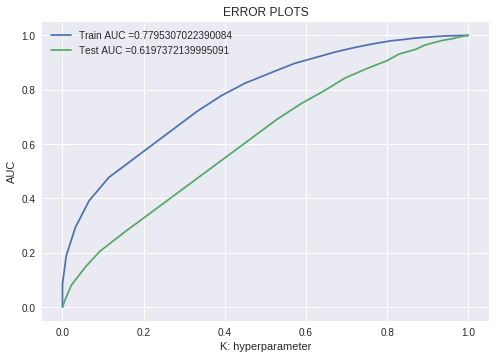

In [15]:
plt.plot(Train_FPR, Train_TPR, label="Train AUC ="+str(auc(Train_FPR, Train_TPR)))
plt.plot(Test_FPR, Test_TPR, label="Test AUC ="+str(auc(Test_FPR, Test_TPR)))
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.show()

In [16]:
A=Classifier.predict(Test_AVG_TFIDF)
print('Confusion Matrix of Test Data')
print(confusion_matrix(Test_y,A))
print('\n')
print(classification_report(Test_y,A))

Confusion Matrix of Test Data
[[   5 1337]
 [   5 8653]]


              precision    recall  f1-score   support

           0       0.50      0.00      0.01      1342
           1       0.87      1.00      0.93      8658

   micro avg       0.87      0.87      0.87     10000
   macro avg       0.68      0.50      0.47     10000
weighted avg       0.82      0.87      0.80     10000



**OBSERVATION.**
1. The correct prediction ( TP+TN ) of our model with K=51 on Test Dataset is  8658(86.58%) .
2. The Area Under Curve value for Test Dataset is 0.61973721(approx) .
3. The kd-tree method takes more time for computation.
4. The Area Under Curve value is low with respect to other methods.

**FINAL TABLE**

In [27]:
d = {'VECTORIZER': ['BOW','BOW','N-GRAM BOW','N-GRAM BOW','TFIDF','TFIDF','AVG-W2VEC','AVG-W2VEC','TFIDF-AVG W2VEC','TFIDF-AVG W2VEC'], 'MODEL': ['BRUTE','KD TREE','BRUTE','KD TREE','BRUTE','KD TREE','BRUTE','KD TREE','BRUTE','KD TREE'], 'HYPER PARAMETER':[41,41,47,47,3,3,51,51,51,51], 'AREA UNDER CURVE':[ 0.711169,0.736757,0.738243,0.738436,0.536160,0.551410,0.863033,0.863090,0.623660,0.619737]}
DATA=[['BOW','BRUTE',41,0.711169],['BOW','KD-TREE',41,0.736757],['N-GRAM BOW','BRUTE',47,0.738243],['N-GRAM BOW','KD-TREE',47,0.738436],['TFIDF','BRUTE',3,0.536160],['TFIDF','KD-TREE',3,0.551410],['AVG-W2VEC','BRUTE',51,0.863033],['AVG-W2VEC','KD-TREE',51,0.863090],['TFIDF-AVG W2VEC','BRUTE',51,0.623660],['TFIDF-AVG W2VEC','KD-TREE',51,0.619737]]
table=pd.DataFrame(data=DATA,columns=d.keys())
print(table)

        VECTORIZER    MODEL  HYPER PARAMETER  AREA UNDER CURVE
0              BOW    BRUTE               41          0.711169
1              BOW  KD-TREE               41          0.736757
2       N-GRAM BOW    BRUTE               47          0.738243
3       N-GRAM BOW  KD-TREE               47          0.738436
4            TFIDF    BRUTE                3          0.536160
5            TFIDF  KD-TREE                3          0.551410
6        AVG-W2VEC    BRUTE               51          0.863033
7        AVG-W2VEC  KD-TREE               51          0.863090
8  TFIDF-AVG W2VEC    BRUTE               51          0.623660
9  TFIDF-AVG W2VEC  KD-TREE               51          0.619737


**POINTS**

*   AVG-W2VEC model is the best model with AUC value 0.86
*   TFIDF model has the lowest value of AUC( 0.55 ) among all the models.



**............................................................................................................................................END...............................................................................................**